## Implementation of Chebyshev's InEquality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def chebyshev_inequality(k):
    return 1/k**2


In [11]:
k = np.arange(1,10,0.5)
p_cheb = np.zeros(len(k))
print("Chebyshev's InEquality for differnt k values: \n")
for i in range(len(k)):
    p_cheb[i]= chebyshev_inequality(k[i])
    print(f'Pr( |𝜇−𝜎| >= {k[i]}𝜎 ) <= {p_cheb[i]}' )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Chebyshev's InEquality for differnt k values: 

Pr( |𝜇−𝜎| >= 1.0𝜎 ) <= 1.0
Pr( |𝜇−𝜎| >= 1.5𝜎 ) <= 0.4444444444444444
Pr( |𝜇−𝜎| >= 2.0𝜎 ) <= 0.25
Pr( |𝜇−𝜎| >= 2.5𝜎 ) <= 0.16
Pr( |𝜇−𝜎| >= 3.0𝜎 ) <= 0.1111111111111111
Pr( |𝜇−𝜎| >= 3.5𝜎 ) <= 0.08163265306122448
Pr( |𝜇−𝜎| >= 4.0𝜎 ) <= 0.0625
Pr( |𝜇−𝜎| >= 4.5𝜎 ) <= 0.04938271604938271
Pr( |𝜇−𝜎| >= 5.0𝜎 ) <= 0.04
Pr( |𝜇−𝜎| >= 5.5𝜎 ) <= 0.03305785123966942
Pr( |𝜇−𝜎| >= 6.0𝜎 ) <= 0.027777777777777776
Pr( |𝜇−𝜎| >= 6.5𝜎 ) <= 0.023668639053254437
Pr( |𝜇−𝜎| >= 7.0𝜎 ) <= 0.02040816326530612
Pr( |𝜇−𝜎| >= 7.5𝜎 ) <= 0.017777777777777778
Pr( |𝜇−𝜎| >= 8.0𝜎 ) <= 0.015625
Pr( |𝜇−𝜎| >= 8.5𝜎 ) <= 0.01384083044982699
Pr( |𝜇−𝜎| >= 9.0𝜎 ) <= 0.012345679012345678
Pr( |𝜇−𝜎| >= 9.5𝜎 ) <= 0.0110803324099723


array([1.        , 0.44444444, 0.25      , 0.16      , 0.11111111,
       0.08163265, 0.0625    , 0.04938272, 0.04      , 0.03305785,
       0.02777778, 0.02366864, 0.02040816, 0.01777778, 0.015625  ,
       0.01384083, 0.01234568, 0.01108033])

In [4]:
## for Comparison,find the probability for unit noraml distribution.
p_norm = np.zeros(len(k))
for i in range(len(k)):
   p_norm[i] = (1 - norm.cdf(k[i])) * 2


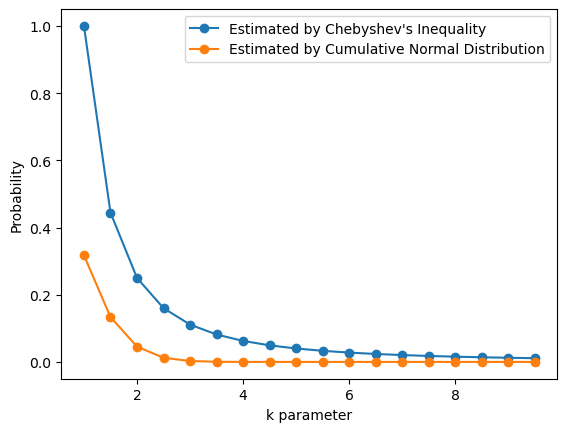

In [5]:
plt.plot(k,p_cheb, '-o')
plt.plot(k,p_norm, '-o')
plt.xlabel('k parameter')
plt.ylabel('Probability')
plt.legend(["Estimated by Chebyshev's Inequality","Estimated by Cumulative Normal Distribution"])

# Implementation using a Dataset.


In [14]:
import seaborn as sns
import pandas as pd

In [18]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


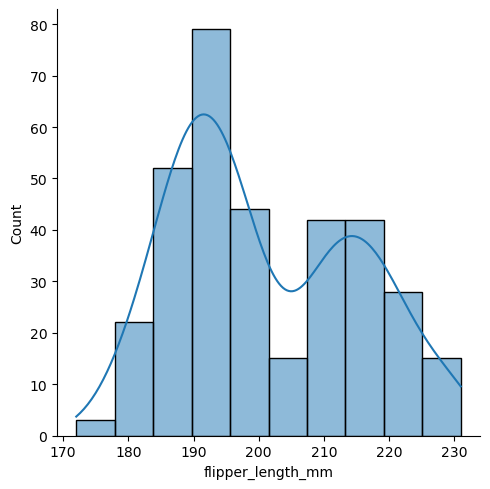

In [20]:
## The Graph will show that the variable does not follow a normal curve
sns.displot(df,x="flipper_length_mm",kde=True)

In [21]:
# WE can still use chebyshev's Inequality for Estimation.
## calculate the mean and standard deviation.

mu_flipper_length = df['flipper_length_mm'].mean()
std_flipper_length = df['flipper_length_mm'].std()
print(f"mean of the variable is : {mu_flipper_length}")
print(f"mean of the variable is : {std_flipper_length}")

mean of the variable is : 200.91520467836258
mean of the variable is : 14.061713679356894


In [22]:
# using the mean,standard deviation and k parameter we can find the upper and lower bound
k = 2
upper_bound = mu_flipper_length + k * std_flipper_length
lower_bound = mu_flipper_length - k * std_flipper_length
print(f"upper bound for k = {k} is {upper_bound}")
print(f"lower bound for k = {k} is {lower_bound}")

upper bound for k = 2 is 229.03863203707638
lower bound for k = 2 is 172.7917773196488


In [24]:
from sklearn.neighbors import KernelDensity

#·Drop NaN values in the variable
X = df["flipper_length_mm"].dropna()

# Convert to numpy ndarray
X = np.array(X).reshape((len(X), 1))

#·Fit a Kernel Density Model
kde = KernelDensity(bandwidth=3).fit(X)

# Estimate new variables using kde model
new_X = np.linspace(np.min(X), np.max(X), 1000)[:, np.newaxis]

log_dens = kde.score_samples(new_X)

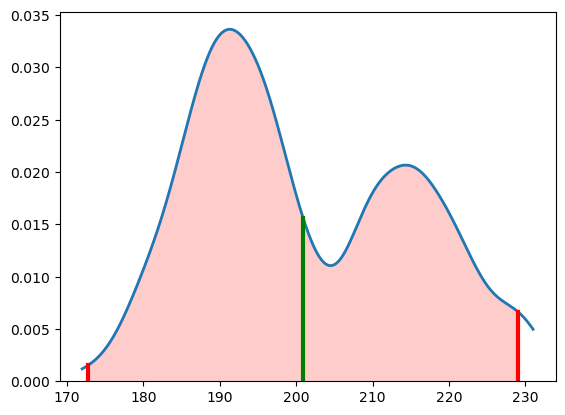

In [28]:
plt.plot(new_X,np.exp(log_dens), lw=2)

# Draw a vertical line to show mean
line_mu_y = np.exp(kde.score_samples(np.array(mu_flipper_length, dtype=object).reshape(1,1)))
plt.plot([mu_flipper_length, mu_flipper_length], [0, line_mu_y[0]], c='g', lw=3)

# Draw a vertical line for upper bound
line_upper_y = np.exp(kde.score_samples(np.array(upper_bound).reshape(1,1)))
plt.plot([upper_bound, upper_bound], [0, line_upper_y[0]], c='r', lw=3)

# Draw a vertical line for lower bound
line_lower_y = np.exp(kde.score_samples(np.array(lower_bound).reshape(1,1)))
plt.plot([lower_bound, lower_bound], [0, line_lower_y[0]], c='r', lw=3)

# Fill under the curve between upper bound and lower bound. 
ptx = np.linspace(lower_bound, upper_bound, 100)
pty = np.exp(kde.score_samples(ptx.reshape(len(ptx),1)))
plt.fill_between(ptx, pty, color='r', alpha=0.2)

plt.ylim(0, )
plt.show()


In [ ]:
## how to find the values less than lower bound 

df["flipper_length_mm"][penguins["flipper_length_mm"] < lower_bound]
